# Selección óptima de portafolios I

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

En la clase pasada vimos que:
- La LAC describe las posibles selecciones de riesgo-rendimiento entre un activo libre de riesgo y un activo riesgoso.
- Su pendiente es igual al radio de Sharpe del activo riesgoso.
- La asignación óptima de capital para cualquier inversionista es el punto tangente de la curva de indiferencia del inversionista con la LAC (depende de las preferencias particulares - aversión al riesgo).

Para todo lo anterior, supusimos que ya teníamos el portafolio óptimo (activo riesgoso).

En el siguiente análisis:
 

**Objetivos:**
- ¿Cuál es el portafolio óptimo de activos riesgosos?
 - ¿Cuál es el mejor portafolio de activos riesgosos?
 - Es un portafolio eficiente en media-varianza.
- Problema: dado un conjunto de activos riesgosos, ¿cómo construimos la mejor combinación?

*Referencia:*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___ 

## 1. Maximizando el radio de Sharpe

### ¿Qué pasa si tenemos dos activos riesgosos?

Cuando tenemos dos o más activos riesgosos, tenemos disponibles diferentes LAC. ¿Qué significan sus pendientes?

<font color=blue> Ver en el tablero.</font>

Pregunta:
- ¿Qué es lo que se quiere?

**Conclusión:** 
- El mejor portafolio de activos no depende de las preferencias individuales, y por tanto va a ser igual para todos.
- Dicho mejor portafolio maximiza el radio de Sharpe.
- A este portafolio lo llamaremos el portafolio eficiente en media-varianza (EMV)

**Idea principal: el portafolio óptimo de activos riesgosos es independiente de las preferencias del inversionista.** 
- El portafolio EMV determina el portafolio óptimo de activos riesgosos.
- Todos tendremos el mismo portafolio de activos riesgosos (EMV), y lo combinaremos con el activo libre de reisgo de acuerdo con las preferencias de cada uno de nosotros (aversión al riesgo).
- La LAC combinando el activo libre de riesgo y el portafolio EMV, se vuelve el conjunto de portafolios eficientes.

Entonces, se deben seguir los siguientes pasos:
1. Crear la frontera media-varianza.
2. Encontrar el portafolio que maximize el radio de Sharpe (portafolio EMV).
3. Construir la frontera eficiente (LAC) del punto $(0,r_f)$ al punto $(\sigma_s,E[r_s])$ del portafolio EMV.
4. Combinar de acuerdo a sus preferencias.
___

## 2. Solución analítica del portafolio EMV: caso con dos activos.

Queremos solucionar el siguiente problema:

\begin{align}
\max_{w_1,w_2} &\quad \frac{E[r_p]-r_f}{\sigma_p}\\
\text{s.a.}    &\quad E[r_p]=w_1E[r_1]+w_2E[r_2]\\
               &\quad \sigma_p=\sqrt{w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1w_2\rho_{12}\sigma_1\sigma_2}\\
               &\quad w_1+w_2=1, \quad w_1,w_2\geq0
\end{align}

el cual es equivalente a

\begin{align}
\max_{w_1} &\quad \frac{w_1E[r_1]+(1-w_1)E[r_2]-r_f}{\sqrt{w_1^2\sigma_1^2+(1-w_1)^2\sigma_2^2+2w_1(1-w_1)\rho_{12}\sigma_1\sigma_2}}\\
\text{s.a.}    &\quad 0\leq w_1\leq1
\end{align}

**Actividad.**
El anterior es un problema de maximizar una función de una variable en un dominio cerrado. No debaría representar dificultad.

Encontrar la solución analítica a este problema.

Quien primero lo haga, y salga a explicarlo al tablero, le subo alguna tarea o quiz a 100.

Deben llegar a:

$$w_{1,EMV}=\frac{(E[r_1]-r_f)\sigma_2^2-(E[r_2]-r_f)\sigma_{12}}{(E[r_2]-r_f)\sigma_1^2+(E[r_1]-r_f)\sigma_2^2-((E[r_1]-r_f)+(E[r_2]-r_f))\sigma_{12}}.$$

Si nadie lo ha hecho en 30 min., procederé a hacerlo yo.

**Nota:** 
- así como obtuvimos una expresión para el peso del portafolio de mínima varianza con dos activos, obtenemos una expresión para el peso del portafolio Eficiente en Media-Varianza. 
- Estas actividades son sin duda un buen ejercicio, y se pueden replicar usando técnicas de varias variables (multiplicadores de Lagrange) cuando se tengan más de dos activos.
- Sin embargo, la complejidad del problema crece considerablemente con el número de variables, y la solución analítica deja de ser viable cuando mencionamos que un portafolio bien diversificado consta aproximadamente de 50-60 activos.
- En esos casos, este problema se soluciona con rutinas numéricas que hagan la optimización por nosotros.
- Por eso, les enseño cómo resolver este problema con optimizadores numéricos, porque son una solución viable y escalable a más variables.

## 3. Ejemplo ilustrativo.

Retomamos el ejemplo de mercados de acciones en los países integrantes del $G5$: EU, RU, Francia, Alemania y Japón.

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


Supondremos, además, que la tasa libre de riesgo es $r_f=5\%$.

In [4]:
# Tasa libre de riesgo
rf = 0.05

Entonces, supondremos que tenemos disponibles los activos correspondientes a los mercados de acciones de EU y Japón, y en adición el activo libre de riesgo.

#### 1. Construir la frontera de mínima varianza

In [5]:
# Vector de w variando entre 0 y 1 con n pasos
n = 101
w = np.linspace(0, 1, n)
# Rendimientos esperados individuales
# Activo1: EU, Activo2:Japon
e1 = annual_ret_summ.loc['Media', 'EU']
e2 = annual_ret_summ.loc['Media', 'Japon']
# Volatilidades individuales
s1 = annual_ret_summ.loc['Volatilidad', 'EU']
s2 = annual_ret_summ.loc['Volatilidad', 'Japon']
# Correlacion
r12 = corr.loc['EU', 'Japon']
# Covarianza
s12 = r12 * s1 * s2

In [6]:
# DataFrame de portafolios: 
# 1. Índice: i
# 2. Columnas 1-2: w, 1-w
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
frontera = pd.DataFrame({
    'w': w,
    '1 - w': 1 - w,
    'media': w * e1 + (1 - w) * e2,
    'vol': ((w * s1)**2 + ((1 - w) * s2)**2 + 2 * w * (1 - w) * s12)**0.5
})
frontera['rs'] = (frontera['media'] - rf) / frontera['vol']

In [9]:
frontera

,w,1 - w,media,vol,rs
0,0.00,1.00,0.149700,0.229800,0.433856
1,0.01,0.99,0.149558,0.227916,0.436820
2,0.02,0.98,0.149416,0.226041,0.439814
3,0.03,0.97,0.149274,0.224176,0.442839
4,0.04,0.96,0.149132,0.222322,0.445894
...,...,...,...,...,...
96,0.96,0.04,0.136068,0.150070,0.573521
97,0.97,0.03,0.135926,0.150877,0.569509
98,0.98,0.02,0.135784,0.151719,0.565415
99,0.99,0.01,0.135642,0.152593,0.561244


In [7]:
# Importar librerías de gráficos
from matplotlib import pyplot as plt

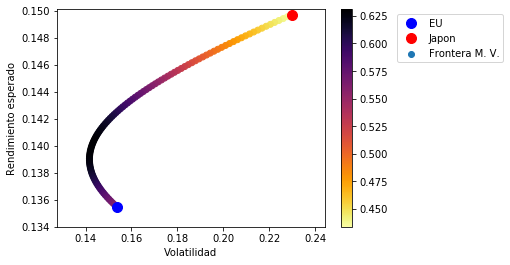

In [8]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a RS
plt.scatter(frontera['vol'],
            frontera['media'],
            c=frontera['rs'],
            cmap='inferno_r',
            label='Frontera M. V.')
plt.plot(s1, e1, 'ob', ms=10, label='EU')
plt.plot(s2, e2, 'or', ms=10, label='Japon')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento esperado')
plt.ylim([0.134, 0.1501])
plt.colorbar()
plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1))

#### 2. Encontrar el portafolio que maximiza el radio de Sharpe (EMV)

Primero, encontramos este portafolio con la fórmula que obtuvimos:

$$w_{1,EMV}=\frac{(E[r_1]-r_f)\sigma_2^2-(E[r_2]-r_f)\sigma_{12}}{(E[r_2]-r_f)\sigma_1^2+(E[r_1]-r_f)\sigma_2^2-((E[r_1]-r_f)+(E[r_2]-r_f))\sigma_{12}}.$$

In [9]:
# Fórmula que obtuvimos
num_emv = ((e1 - rf) * s2**2 - (e2 - rf) * s12)
den_emv = (e2 - rf) * s1**2 + (e1 - rf) * s2**2 - (e1 - rf + e2 - rf) * s12
w_emv = num_emv / den_emv
w_emv, 1 - w_emv

(0.6983139170512034, 0.3016860829487966)

Ahora sí, con la función scipy.optimize.minimize

In [10]:
# Importar la función minimize del módulo optimize de la librería scipy
from scipy.optimize import minimize

In [17]:
rf, e1, e2, s1, s2, s12

(0.05, 0.1355, 0.1497, 0.1535, 0.2298, 0.00939354609)

In [11]:
# Función objetivo (-RS)
def minus_rs(w, rf, e1, e2, s1, s2, s12):
    erp = w * e1 + (1 - w) * e2
    sp = ((w * s1)**2 + ((1 - w) * s2)**2 + 2 * w * (1 - w) * s12)**0.5
    rs = (erp - rf) / sp
    return -rs

In [12]:
# Dato inicial
w0 = 0.5
# Cotas de las variables
bnds = ((0, 1),)

In [13]:
# Optimización numérica
emv = minimize(
    fun=minus_rs,
    x0=w0,
    args=(rf, e1, e2, s1, s2, s12),
    bounds=bnds
)
# Resultado
emv

      fun: array([-0.63087253])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.39728246e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 4
   status: 0
  success: True
        x: array([0.69831582])

In [14]:
w_emv_ = emv.x
w_emv_, 1 - w_emv_

(array([0.69831582]), array([0.30168418]))

In [15]:
w_emv, 1 - w_emv

(0.6983139170512034, 0.3016860829487966)

In [16]:
# Rendimiento esperado y volatilidad del portafolio emv
e_emv = w_emv * e1 + (1 - w_emv) * e2
s_emv = ((w_emv * s1)**2 + ((1 - w_emv) * s2)**2 + 2 * w_emv * (1 - w_emv) * s12)**0.5
e_emv, s_emv

(0.13978394237787292, 0.14231708951606933)

Con lo anterior, podemos obtener datos de rendimiento esperado y volatilidad del portafolio EMV

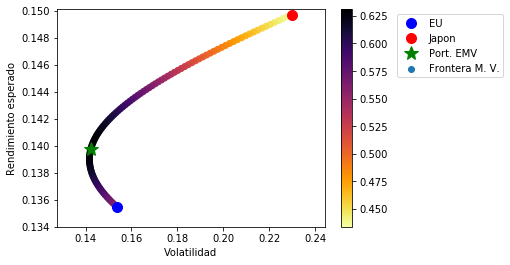

In [20]:
# Rendimiento esperado y volatilidad del portafolio EMV
plt.scatter(frontera['vol'],
            frontera['media'],
            c=frontera['rs'],
            cmap='inferno_r',
            label='Frontera M. V.')
plt.plot(s1, e1, 'ob', ms=10, label='EU')
plt.plot(s2, e2, 'or', ms=10, label='Japon')
plt.plot(s_emv, e_emv, '*g', ms=15, label='Port. EMV')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento esperado')
plt.ylim([0.134, 0.1501])
plt.colorbar()
plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1))

#### 3. Construir LAC

Ahora, dibujamos la LAC, combinando el portafolio EMV con el activo libre de riesgo:

In [21]:
# Vector de wp variando entre 0 y 1.5 con n pasos
n = 51
wp = np.linspace(0, 1.5, n)

In [22]:
# DataFrame de CAL: 
# 1. Índice: i
# 2. Columnas 1-2: wp, wrf
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
lac = pd.DataFrame({
    "wp": wp,
    "wrf": 1 - wp,
    "media": wp * e_emv + (1 - wp) * rf,
    "vol": wp * s_emv
})
lac

,wp,wrf,media,vol
0,0.00,1.00,0.050000,0.000000
1,0.03,0.97,0.052694,0.004270
2,0.06,0.94,0.055387,0.008539
3,0.09,0.91,0.058081,0.012809
4,0.12,0.88,0.060774,0.017078
5,0.15,0.85,0.063468,0.021348
6,0.18,0.82,0.066161,0.025617
7,0.21,0.79,0.068855,0.029887
8,0.24,0.76,0.071548,0.034156
9,0.27,0.73,0.074242,0.038426


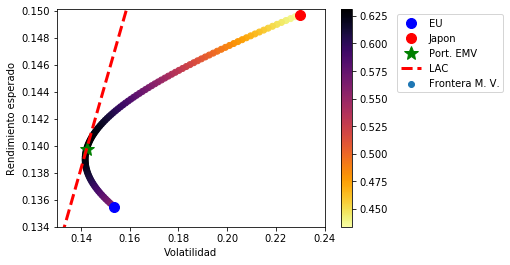

In [25]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR, portafolio EMV y LAC
plt.scatter(frontera['vol'],
            frontera['media'],
            c=frontera['rs'],
            cmap='inferno_r',
            label='Frontera M. V.')
plt.plot(s1, e1, 'ob', ms=10, label='EU')
plt.plot(s2, e2, 'or', ms=10, label='Japon')
plt.plot(s_emv, e_emv, '*g', ms=15, label='Port. EMV')
plt.plot(lac['vol'], lac['media'], 'r--', lw=3, label='LAC')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento esperado')
plt.axis([0.13, 0.24, 0.134, 0.1501])
plt.colorbar()
plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1))

#### 4. Combinación óptima de acuerdo a preferencias

Con los datos anteriores, y la caracterización de aversión al riesgo, se escoge la combinación óptima entre el portafolio EMV y el activo libre de riesgo de acuerdo a:

$$w^\ast=\frac{E[r_s-r_f]}{\gamma\sigma_s^2}.$$

In [41]:
# Para gamma=7
g = 10

In [42]:
w_opt = (e_emv - rf) / (g * s_emv**2)
w_opt, 1 - w_opt

(0.44328655997325, 0.5567134400267499)

In [43]:
# Ponderaciones finales: índice de EU, índice de Japón, tasa libre de riesgo
{'EU': w_opt * w_emv, 'JP': w_opt * (1 - w_emv), 'rf': 1 - w_opt}

{'EU': 0.3095531740710734, 'JP': 0.13373338590217662, 'rf': 0.5567134400267499}

In [44]:
s_final = w_opt * s_emv
e_final = w_opt * e_emv + (1 - w_opt) * rf
s_final, e_final

(0.06308725303698345, 0.0898000149575238)

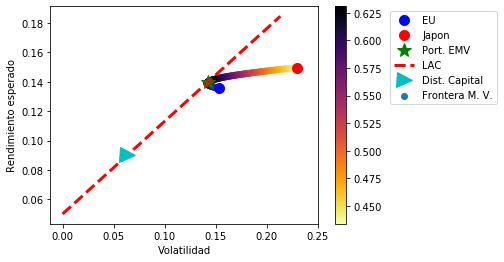

In [45]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR, portafolio EMV y LAC
plt.scatter(frontera['vol'],
            frontera['media'],
            c=frontera['rs'],
            cmap='inferno_r',
            label='Frontera M. V.')
plt.plot(s1, e1, 'ob', ms=10, label='EU')
plt.plot(s2, e2, 'or', ms=10, label='Japon')
plt.plot(s_emv, e_emv, '*g', ms=15, label='Port. EMV')
plt.plot(lac['vol'], lac['media'], 'r--', lw=3, label='LAC')
plt.plot(s_final, e_final, '>c', ms=15, label='Dist. Capital')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento esperado')
#plt.axis([0.13, 0.24, 0.134, 0.1501])
plt.colorbar()
plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1))

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>